# ZEWK - Hands On Datenvisualisierung, Explorative Datenanalyse in Python
Seminar von Letty und Karen  

Dieses Notebook dient als Beispiel für die Implementation einer Datenvisualisierungspipeline in der Sprache Python. Es kann sowohl in Jupyter als auch in Jupyter Lab ausgeführt werden, jedoch können sich einzelne Shortcuts unterscheiden.

## Benutzung von Jupyter (Lab)

Hier ein paar praktische und wichtige Kommandos und Tastenkombinationen die ihr kennen solltet:
Außerhalb einer Zelle:

* ENTER - Zelle editieren  
* strg + ENTER - Zelle ausführen  
* shift + ENTER - Zelle ausführen und zur nächsten gehen  


Innerhalb einer Zelle (Editiermodus der Zelle):

* ESC - Zelle verlassen  
* D, D - Zelle löschen  
* A - leere Zelle oberhalb (above) einfügen  
* B - leere Zelle unterhalb (below) einfügen  


## Explorative Datenanalyse
Wir haben einen unbekannten Datensatz (https://github.com/owid/covid-19-data/tree/master/public/data) und wollen herausfinden welche Daten sich darin verbergen um Arbeitshypothesen und Fragestelltungen für Visualisierungen zu entwickeln.

### Setup von hilfreichen Python Packages

In [1]:
%matplotlib inline 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Import der Daten

In [2]:
data = pd.read_excel("owid-covid-data.xlsx")

### Übersicht über die Daten bekommen
Welche Parameter haben wir?
Zusammenfassung der Daten erzeugen

In [3]:
# Informationen über die verwendeten Datentypen
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55247 entries, 0 to 55246
Data columns (total 49 columns):
iso_code                              54934 non-null object
continent                             54621 non-null object
location                              55247 non-null object
date                                  55247 non-null object
total_cases                           51615 non-null float64
new_cases                             54324 non-null float64
new_cases_smoothed                    53524 non-null float64
total_deaths                          42439 non-null float64
new_deaths                            54324 non-null float64
new_deaths_smoothed                   53524 non-null float64
total_cases_per_million               51338 non-null float64
new_cases_per_million                 54260 non-null float64
new_cases_smoothed_per_million        53459 non-null float64
total_deaths_per_million              42177 non-null float64
new_deaths_per_million                542

In [4]:
# Parameterübersicht
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_r

In [5]:
# Zusammenfassung der Datentabelle
data.describe() # .transpose()  # für bessere konsumierbarkeit

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.161500e+04,54324.000000,53524.000000,4.243900e+04,54324.000000,53524.000000,51338.000000,54260.000000,53459.000000,42177.000000,...,48510.000000,32337.000000,49133.000000,50924.000000,38259.000000,37766.000000,23229.000000,44273.000000,54229.000000,47430.000000
mean,1.544013e+05,1817.665654,1782.344956,6.562907e+03,45.762352,45.513824,2862.198683,35.800823,34.521980,91.058431,...,20678.544760,12.377639,252.356466,8.063169,10.756741,32.640678,52.160548,3.093203,73.954798,0.722739
std,1.551656e+06,16729.387714,16211.423251,5.325832e+04,380.017749,367.144743,5629.671459,125.954962,91.165824,175.760417,...,20334.425707,19.392793,117.442143,4.174354,10.472859,13.448491,31.639405,2.515747,7.393933,0.153204
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.640000e+02,0.000000,0.857000,1.200000e+01,0.000000,0.000000,83.516000,0.000000,0.237000,3.760000,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.947000e+03,13.000000,18.429000,8.100000e+01,0.000000,0.286000,547.833000,2.067000,3.703000,19.409000,...,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.752000
75%,2.004000e+04,218.000000,228.143000,6.770000e+02,4.000000,3.857000,3178.607000,24.336250,27.509000,81.367000,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,4.937324e+07,584128.000000,520994.143000,1.243083e+06,10491.000000,7565.000000,66459.587000,8652.658000,2472.188000,1237.551000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [6]:
# Übersicht der vorhandenen Kontinente
data.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [7]:
# wie viele einträge haben wir pro kontinent?
data.continent.value_counts()

Europe           14325
Africa           13087
Asia             13061
North America     8756
South America     3274
Oceania           2118
Name: continent, dtype: int64

<AxesSubplot:>

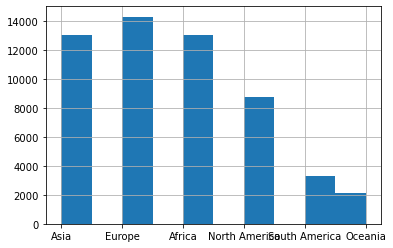

In [8]:
# wie viele einträge haben wir pro kontinent? als Graphik
data.continent.hist()

In [9]:
# Ausgabe eines bestimmten parameters (hier total_cases) gruppiert nach continent
data.groupby("continent")['total_cases'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,12784.0,13220.203927,61321.840463,1.0,298.0,1378.0,5783.0,734175.0
Asia,11740.0,94046.594123,521040.710444,1.0,298.0,5567.0,55141.0,8462080.0
Europe,12838.0,57378.787428,160655.400624,1.0,574.0,4474.0,32523.0,1733440.0
North America,8559.0,127955.399112,791484.758170,1.0,19.0,140.0,5043.5,9739545.0
Oceania,1975.0,2204.802532,5803.838098,1.0,21.0,61.0,1158.0,27645.0
South America,3129.0,279332.219879,813340.224560,1.0,541.0,8225.0,139319.0,5590025.0


In [10]:
# Ausgabe eines bestimmten parameters (hier total_cases) gruppoert nach continent
data.groupby("continent")['weekly_icu_admissions_per_million'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,328.0,4.743933,8.964706,0.0,0.373,1.368,4.4785,67.032
North America,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oceania,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South America,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Auswahl von Daten
# Aggregation der GDPR Daten pro Land 
# (die Daten sind für jeden zeitlichen Eintrag gleich, dadurch brauchen wir nur jeweils den ersten Eintrag)
data_gdp = data.groupby("location").first()
data_gdp = data_gdp.reset_index()

# Nur daten von Deutschland
data_DE = data.loc[data.location == "Germany"]
data_DE = data_DE.reset_index()
#data_DE.describe().transpose()

### Analyse fehlender Werte

In [12]:
# wie viel prozent der Daten fehlen pro Parameter?
data.isna().sum() / len(data) * 100

iso_code                               0.566547
continent                              1.133093
location                               0.000000
date                                   0.000000
total_cases                            6.574113
new_cases                              1.670679
new_cases_smoothed                     3.118721
total_deaths                          23.183159
new_deaths                             1.670679
new_deaths_smoothed                    3.118721
total_cases_per_million                7.075497
new_cases_per_million                  1.786522
new_cases_smoothed_per_million         3.236375
total_deaths_per_million              23.657393
new_deaths_per_million                 1.786522
new_deaths_smoothed_per_million        3.236375
icu_patients                          92.991475
icu_patients_per_million              92.991475
hosp_patients                         91.740728
hosp_patients_per_million             91.740728
weekly_icu_admissions                 99

In [13]:
# wie viel fehlende werte (in prozent) haben wir in den Daten zu Europa?
data_EU = data.loc[data.continent == "Europe"]
data_EU.isna().sum() / len(data_EU) * 100

iso_code                               0.000000
continent                              0.000000
location                               0.000000
date                                   0.000000
total_cases                           10.380454
new_cases                              1.047120
new_cases_smoothed                     2.317627
total_deaths                          21.710297
new_deaths                             1.047120
new_deaths_smoothed                    2.317627
total_cases_per_million               10.380454
new_cases_per_million                  1.047120
new_cases_smoothed_per_million         2.317627
total_deaths_per_million              21.710297
new_deaths_per_million                 1.047120
new_deaths_smoothed_per_million        2.317627
icu_patients                          72.970332
icu_patients_per_million              72.970332
hosp_patients                         68.146597
hosp_patients_per_million             68.146597
weekly_icu_admissions                 97

### Ausreißer

In [14]:
average_gdp = data_gdp.gdp_per_capita.mean()
std_gdp = data_gdp.gdp_per_capita.std()
print("positive outliers:", data_gdp.location[data_gdp.gdp_per_capita > (average_gdp + 2*std_gdp)])

positive outliers: 29                   Brunei
95                  Ireland
106                  Kuwait
116              Luxembourg
145                  Norway
157                   Qatar
171               Singapore
200    United Arab Emirates
Name: location, dtype: object


In [15]:
print("negative outliers:", data_gdp.location[data_gdp.gdp_per_capita < (average_gdp - 2*std_gdp)])
# the data is skrewed!
print(average_gdp - 2*std_gdp)

negative outliers: Series([], Name: location, dtype: object)
-20183.398148397235


### Einfache visualisierungen - Verteilungsanalyse

<AxesSubplot:>

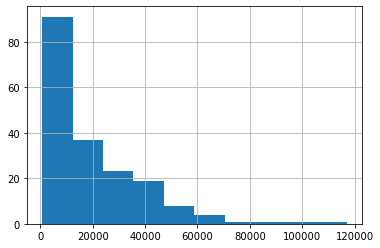

In [16]:
data_gdp.gdp_per_capita.hist()